In [3]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

Hello, TensorFlow!


In [4]:
import tensorflow as tf

# Declare placeholder with datatype
x = tf.placeholder(tf.float32)

# You can also define constant with specified datatype
a = tf.constant(32, dtype=tf.float32)
y = tf.placeholder(tf.float32)

z = a*x + y*y

sess = tf.Session()

print(sess.run(z, {x: 2, y: 4})) # 80.0
print(sess.run(z, {x: [1, 2, 3], y: [2, 3, 4]})) # [36. 73. 112.]

# Define Variables
W = tf.Variable([.25], dtype=tf.float32)
b = tf.Variable([-.64], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

# Initialize 
init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(linear_model, {x: [4, 5, 1, 8]}))
# [ 0.36000001  0.61000001 -0.38999999  1.36000001]

sess.close()

80.0
[  36.   73.  112.]
[ 0.36000001  0.61000001 -0.38999999  1.36000001]


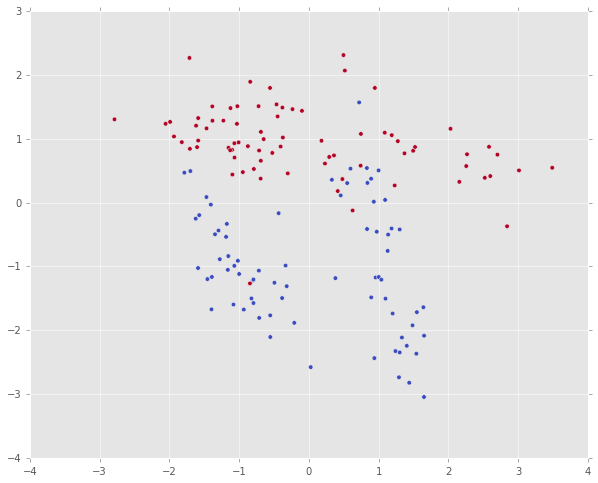

In [5]:
# Import all libraries
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import make_classification
from matplotlib import style
import matplotlib
import tensorflow as tf

# Matplotlib Config
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
style.use('ggplot')
# Create Dataset
x, y = make_classification(150, n_features=2, n_redundant=0)
y = y.reshape((150, 1))
# Plot the dataset
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.coolwarm)

# Function to plot decision boundary
def plot_decision_boundary(pred_func, X):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.copper)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

(0, 0.59316874)
(1000, 0.27996427)
(2000, 0.26154396)
(3000, 0.2550787)
(4000, 0.25184929)
(5000, 0.250007)
(6000, 0.24887937)
(7000, 0.2481575)
(8000, 0.24768052)
(9000, 0.24735785)
(10000, 0.24713574)
('\nAccuracy: ', 0.91333336)


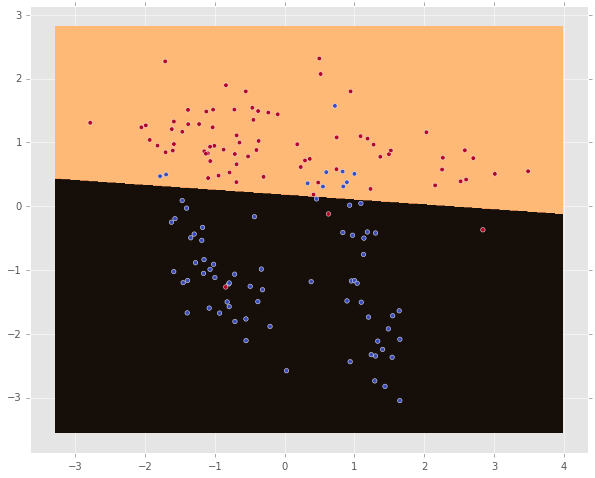

In [6]:
# Define Placeholders for X and Y
# None represents the number of training examples.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# Weights and Biases
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hyposthesis
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# Cost Function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

# Optimize Cost Function using Gradient Descent
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Prediction and Accuracy
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Start Session
sess = tf.Session()

# Initialize Variables
sess.run(tf.global_variables_initializer())

# Train the model
for step in range(10001):
    cost_val, _ = sess.run([cost, train], feed_dict={X: x, Y: y})
    if step % 1000 == 0:
    	# Print Cost Function
        print(step, cost_val)

# Accuracy report        
h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x, Y: y})
print("\nAccuracy: ", a)

# Plot decision boundary
plot_decision_boundary(lambda x: sess.run(predicted, feed_dict={X:x}), x)